In [1]:
import pathlib
import os 
import pandas as pd 
import numpy as np 

from sudulunu.helpers import pp, make_num, dumper, rc
import json

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/homebrew/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
iterrer = pathlib.Path('/Users/josh/Github/chart_scripts/231227_wiki_boxing_day/input/wiki/dumps/')
# iterrer = pathlib.Path('/Users/josh/Github/chart_scripts/231227_wiki_boxing_day/input/wiki/dumps/2017_12/')
# iterrer = pathlib.Path('/Users/josh/Github/chart_scripts/231227_wiki_boxing_day/input/wiki/dumps/2023_12')
fillos = list(iterrer.rglob("*.json"))

# print(len(fillos))
# print(fillos)
counter = 0

cols = []

listo = []
for fillo in fillos:

    stemmo = str(fillo).split("/")[-1].replace(".json", '').strip()

    with open(fillo) as f:
        data = json.load(f)

        # print(type(data))
        if isinstance(data, list):

            inter = pd.read_json(fillo)

        else: 
            inter = pd.read_json(data)

    # inter['scraped_datetime'] = pd.to_datetime(inter['scraped_datetime'])
    # inter['scraped_datetime'] = inter['scraped_datetime'].dt.strftime("%Y-%m-%d")
    inter['scraped_datetime'] = stemmo
    
    try:
        inter['scraped_datetime'] = pd.to_datetime(inter['scraped_datetime'])
    except Exception as e:
        # print(e)
        inter['scraped_datetime'] = pd.to_datetime(inter['scraped_datetime'], format="%Y_%m_%d_%M")

    inter['scraped_datetime'] = inter['scraped_datetime'].dt.strftime("%Y-%m-%d")

    listo.append(inter)
    cols.extend(inter.columns.tolist())
    counter += 1
    if counter % 500 == 0:
        print(counter)

print(list(set(cols)))


/var/folders/p5/291tnlbj3vn89gqk4spr3v9h0000gn/T/ipykernel_59469/2428688181.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inter['scraped_datetime'] = pd.to_datetime(inter['scraped_datetime'])
/var/folders/p5/291tnlbj3vn89gqk4spr3v9h0000gn/T/ipykernel_59469/2428688181.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inter['scraped_datetime'] = pd.to_datetime(inter['scraped_datetime'])
/var/folders/p5/291tnlbj3vn89gqk4spr3v9h0000gn/T/ipykernel_59469/2428688181.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inter['scraped_datetime'] = pd.to_datetime(inter['scr

500


/var/folders/p5/291tnlbj3vn89gqk4spr3v9h0000gn/T/ipykernel_59469/2428688181.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inter['scraped_datetime'] = pd.to_datetime(inter['scraped_datetime'])
/var/folders/p5/291tnlbj3vn89gqk4spr3v9h0000gn/T/ipykernel_59469/2428688181.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inter['scraped_datetime'] = pd.to_datetime(inter['scraped_datetime'])
/var/folders/p5/291tnlbj3vn89gqk4spr3v9h0000gn/T/ipykernel_59469/2428688181.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inter['scraped_datetime'] = pd.to_datetime(inter['scr

1000
1500
2000
2500
3000
3500
4000
4500
['Trend', 'Search_var', 'Page', 'scraped_datetime', 'Views', 'publication', 'Rank']


In [3]:
cat = pd.concat(listo)
# 'Rank', 'Trend', 'publication', 'scraped_datetime', 'Page', 'Views', 'Search_var'

cat = cat[['Rank', 'Trend', 'publication', 'scraped_datetime', 'Page', 'Views', 'Search_var']]


cat['scraped_datetime'] = pd.to_datetime(cat['scraped_datetime'])
# # cat['scraped_datetime'] = pd.to_datetime(cat['scraped_datetime'],format='mixed')
cat.sort_values(by=['scraped_datetime'], ascending=True, inplace=True)

cat['Trend'] = cat['Trend'].fillna(cat['Search_var'])
cat['Trend'] = cat['Trend'].str.title()
cat.dropna(subset=['Trend'], inplace=True)
cat.drop_duplicates(subset=['scraped_datetime', 'Trend'], inplace=True)

(<Figure size 700x700 with 6 Axes>,
 array([<Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

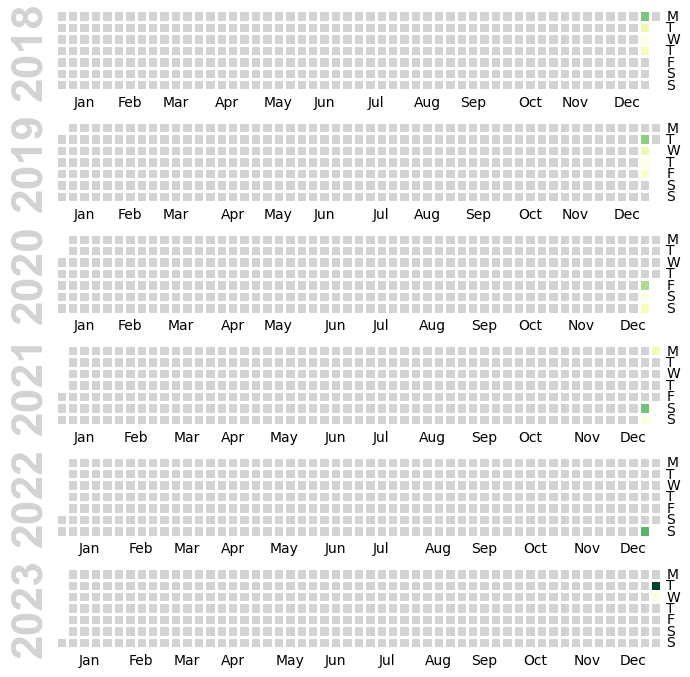

In [36]:
bat = cat.copy()
# 'Rank', 'Trend', 'publication', 'scraped_datetime', 'Page', 'Views', 'Search_var'

bat = bat[['Rank', 'Trend', 'scraped_datetime']]

# bat.dropna(subset=['Trend'], inplace=True)

bat['Trend'] = bat['Trend'].str.strip()

bat = bat.loc[bat['Trend'].str.strip() == "Boxing Day"]


bat.rename(columns={'scraped_datetime': "Date"}, inplace=True)

bat['Date'] = pd.to_datetime(bat['Date'])
bat.sort_values(by=['Date'], ascending=True, inplace=True)

# bat[]

# dateindex = pd.date_range(bat['Date'].min(), bat['Date'].max(), freq='D')

bat.set_index('Date', inplace=True)
bat = bat.reindex(dateindex)
bat.reset_index(inplace=True)

for col in ['Rank', 'Trend']:
    bat[col].fillna('', inplace=True)

bat.rename(columns={'index': "Date"}, inplace=True)

bat['Rank'] = pd.to_numeric(bat['Rank'])
bat = bat.loc[bat['Rank'] <= 100]
# pp(bat)

# print(bat.tail(50))

# sns.lineplot(data=bat, x="Date", y="Rank")

# sns.scatterplot(data=bat, x="Date", y="Rank", legend=False, sizes=(20, 2000))


import calplot

bat = bat[["Date", "Rank"]]
bat.set_index("Date", inplace=True)

# pp(bat)
# calplot.calplot(bat,
#                 suptitle = 'Calendar',
#                 suptitle_kws = {'x': 0.5, 'y': 1.0})

import calmap 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=7,7
calmap.calendarplot(bat, monthticks=3, daylabels='MTWTFSS',
                    dayticks=True, cmap='YlGn',
                    fillcolor='lightgrey')
